### 单变量线性回归 ###

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
path = 'ex1data1.txt'
data = pd.read_csv(path,header=None,names=['Population','Profit'])
data.head() #观察前五行

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


第一个作业，目标是对我的txt中的数据运算我的损失函数

In [76]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


数据的相关属性，关键属性mean(均值),std(标准差)

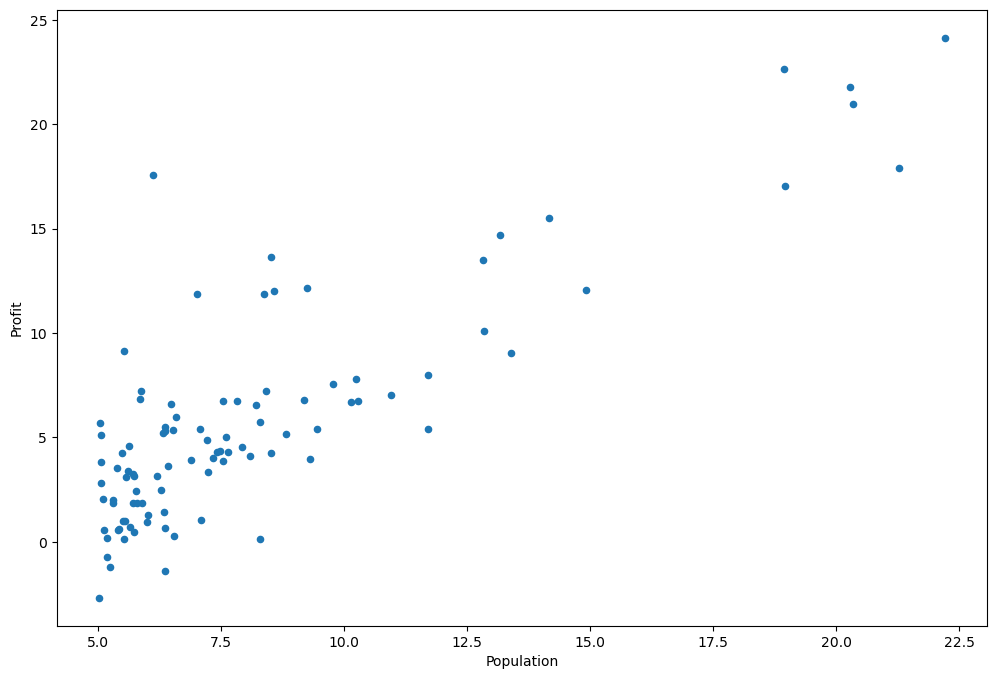

In [77]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))
plt.show()

关键记录：plt的绘图函数api 
data.plot() 核心参数：kind=>图像类型，scatter为散点图还有line线图等，figsize=>图大小

目的：显示一下我的散点图在界面上长什么样子可视化

现在开始要对我的这个数据集跑一个代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [78]:
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T) - y),2)
    return np.sum(inner) / (2 * len(X))

对于代价函数公式的计算，hx的计算

In [79]:
data.insert(0,'Ones',1)

对于theta0来说x默认为1,直接向量加一行
对于x和y区开来

In [80]:
cols = data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [81]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


核心代码：iloc提取数据
iloc[行选择,列选择]
data.shap[1],二维的大小

In [82]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [83]:
X=np.matrix(X.values)
y=np.matrix(y.values)
theta = np.matrix(np.zeros((1,2)))

对于本来的Numpy数组类型进行矩阵的转换，使用matrix来对值包裹进行转换

In [84]:
theta

matrix([[0., 0.]])

In [85]:
X.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [86]:
computeCost(X,y,theta)

32.072733877455676

对于矩阵进行代价函数的计算得到结果

### batch gradient decent (批量梯度下降) ###

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

目的：对于单变量的情况计算一个梯度下降拟合曲线

In [87]:
def gradientDescent(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X*theta.T) - y

        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta=temp
        cost[i]=computeCost(X,y,theta)
    return theta,cost

分析：
temp = np.matrix(np.zeros(theta.shape))  # 临时存储参数更新值
parameters = int(theta.ravel().shape[1])  # 参数数量（特征数 n）
cost = np.zeros(iters)  # 记录每次迭代的损失值



for i in range(iters):
    error = (X * theta.T) - y  # 计算预测值与真实值的误差
    # 遍历每个参数（theta_j）
    for j in range(parameters):
        term = np.multiply(error, X[:,j])  # 误差与第j个特征相乘
        # 更新theta_j（梯度下降公式）
        temp[0,j] = theta[0,j] - (alpha / len(X)) * np.sum(term)
    # 同步更新所有参数
    theta = temp
    # 计算当前参数对应的损失值
    cost[i] = computeCost(X, y, theta)



tips:
1. 对于temp的作用，theta不能覆盖计算，对于多个theta要一次全部更新完毕，

In [88]:
alpha = 0.01
iters = 1000

In [89]:
g,cost=gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [90]:
computeCost(X,y,g)

4.515955503078914

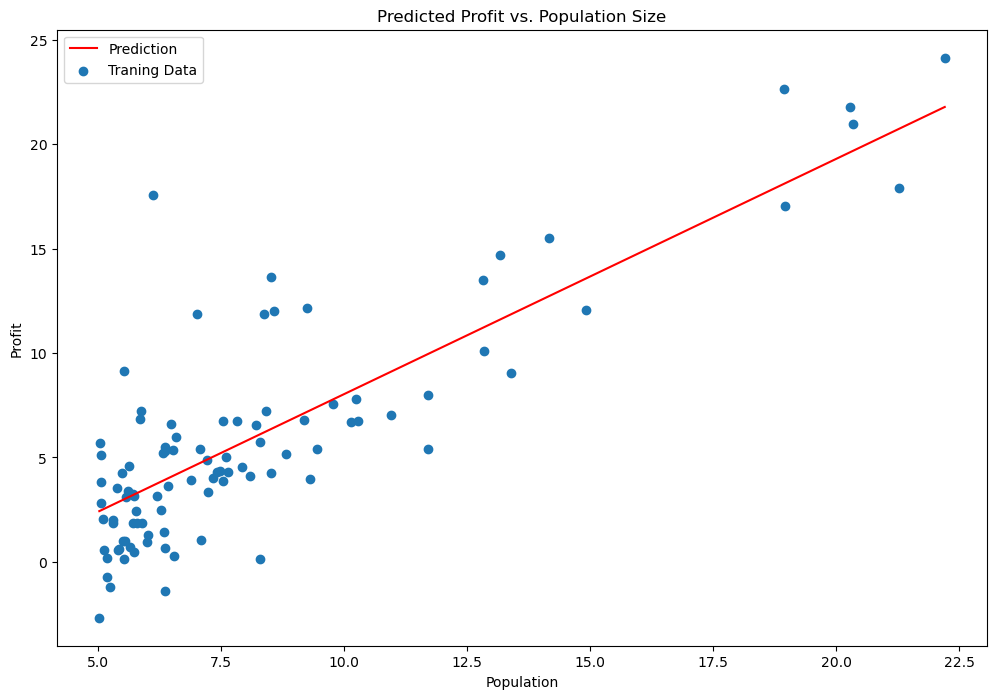

In [91]:
x=np.linspace(data.Population.min(),data.Population.max(),100)
f= g[0 , 0]+(g[0 ,1]*x)

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

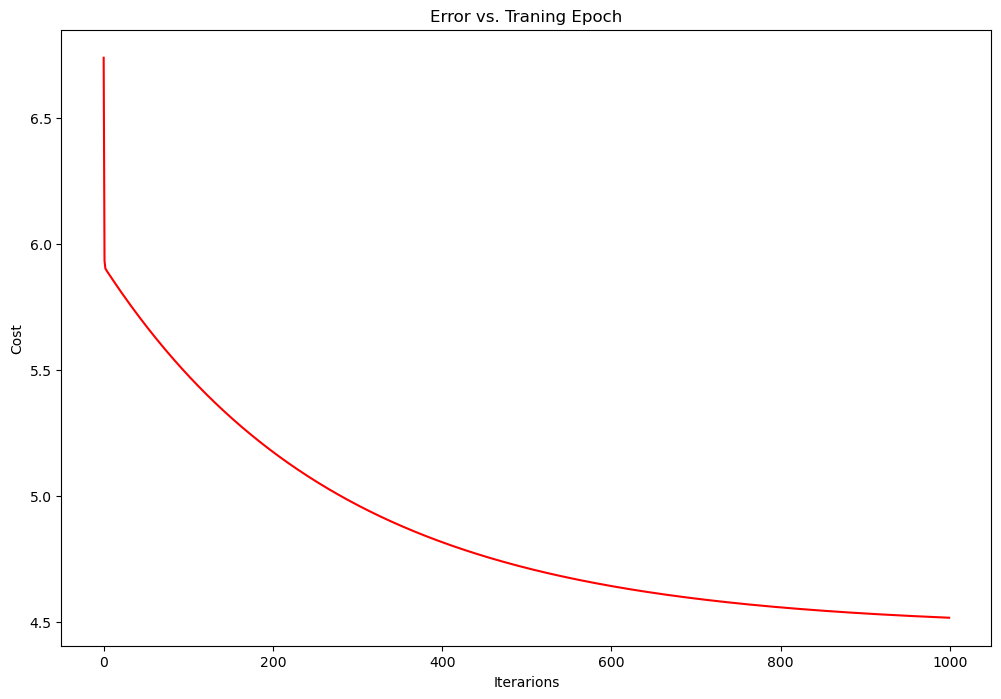

In [92]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterarions')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Traning Epoch')
plt.show()

### 3.多变量线性回归 ###

目的：实现对于多变量地线性回归分析  
对我：单次了解多次掌握如何使用numpy原生进行回归分析  
实践：完成代码

In [93]:
path = 'ex1data2.txt'
data2= pd.read_csv(path,header=None,names=['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [94]:
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


目的：通过特征归一化来优化梯度下降的效率  
对我：复习归一化公式，数据-数据均值/数据标准差

In [95]:
data2.insert(0, 'Ones', 1)
#对于x矩阵需要做一个预处理加一列

cols=data2.shape[1]
x2=data2.iloc[:,0:cols-1]
y2=data2.iloc[:,cols-1:cols]
#矩阵划分预处理

x2=np.matrix(x2.values)
y2=np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))
#x,y和西塔的矩阵获取

g2,cost2=gradientDescent(x2,y2,theta2,alpha,iters)

computeCost(x2,y2,g2)

0.13070336960771892

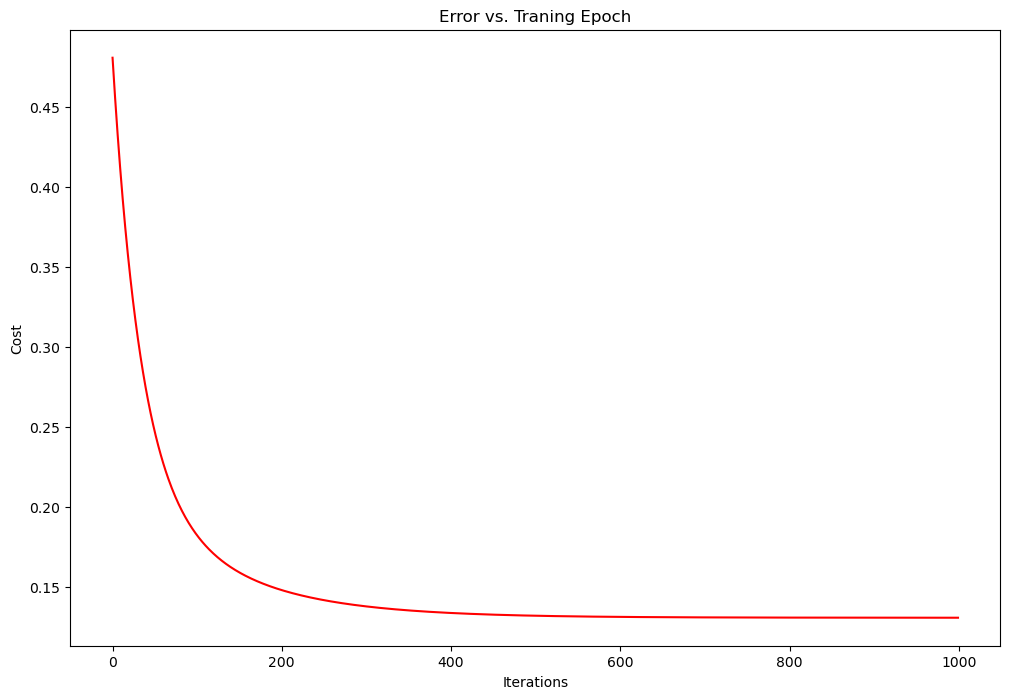

In [96]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost2,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Traning Epoch')
plt.show()

In [103]:
from sklearn import linear_model
model = linear_model.LinearRegression()
X=np.asarray(X)
y=np.asarray(y)
model.fit(X, y)

LinearRegression()

目的：使用scikit-learn库来完成线性回归  
对我：了解库函数和朴素做法  
获得：首先调包创建类liner_model.LinerRegression()  
然后使用model.fit(x,y)直接就可以完成

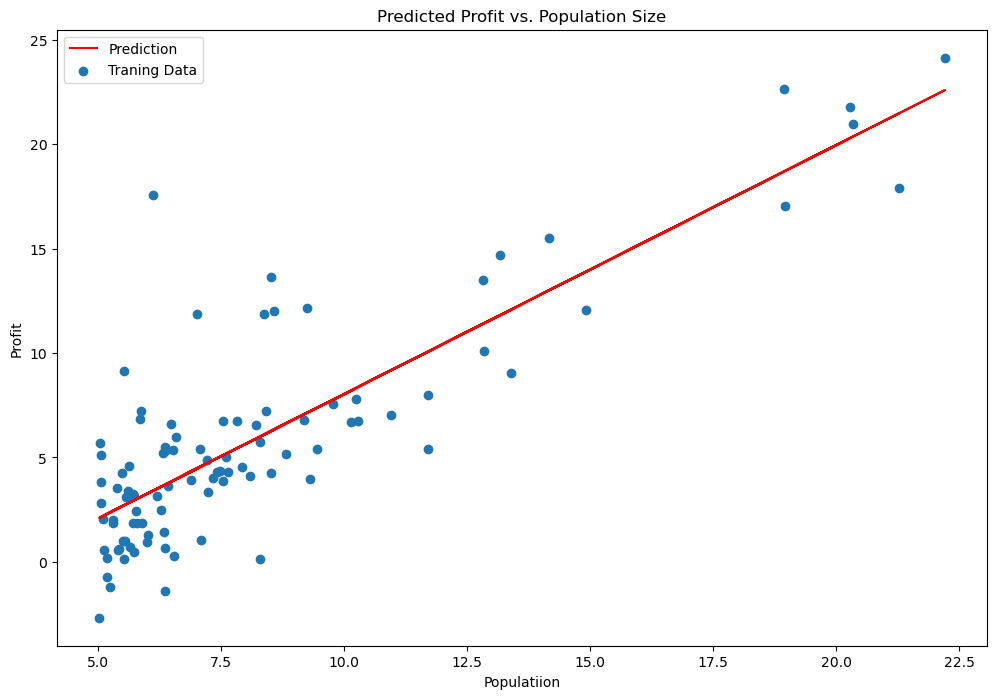

In [107]:
x=np.array(X[:,1].flatten()) #扁平化
f=model.predict(X).flatten()

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Populatiion')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## 4.正规方程(normal equation) ##

目的：使用正规方程求解线性回归  
对我：熟悉正规方程公式  
实践：

In [110]:
def normalEqn(X,y):
    theta=np.linalg.inv(X.T@X)@X.T@y
    return theta

In [112]:
final_theta2=normalEqn(X,y)
final_theta2

array([[-3.89578088],
       [ 1.19303364]])

In [113]:
computeCost(X,y,final_theta2)

74.47480458494644

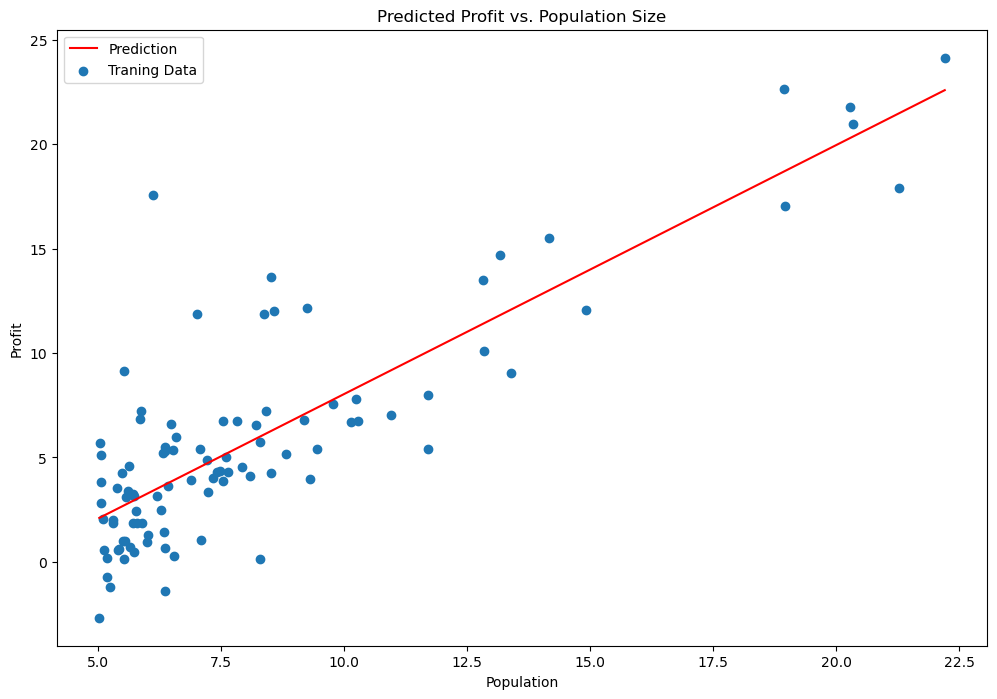

In [115]:
x=np.linspace(data.Population.min(),data.Population.max(),100)
f= final_theta2[0]+(final_theta2[1]*x)

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()